In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
dataset = pd.read_csv("usnews_dataset.csv")
print("Raw data")
# Display first 5 rows
dataset.head(5)

Raw data


,Name,Ranking,usnews.com link,Tuition and Fees,Room and Board,Total Enrollment,School Type,Year Founded,Religiious Affiliation,Academic Calendar,...,Total undergraduate enrollment,Undergraduates who are first generation,Out-of-state students,International students,Registered clubs and organizations,Number of sports,Unnamed: 76,Peer_assessment,First_year_top_ten,Social Mobility rank
0,Williams College,1,https://www.usnews.com/best-colleges/williams-...,"$57,280",14990,2127.0,"Private, Coed",1793.0,None,04-01-04,...,2073.0,22%,86%,7.80%,154.0,17.0,NaN,4.7,89%,90.0
1,Amherst College,2,https://www.usnews.com/best-colleges/amherst-c...,"$58,640",15310,1855.0,"Private, Coed",1821.0,None,Semester,...,1855.0,21%,87%,8.10%,177.0,12.0,NaN,4.6,88%,99.0
2,Swarthmore College,3,https://www.usnews.com/best-colleges/swarthmor...,"$54,656",16088,1559.0,"Private, Coed",1864.0,None,Semester,...,1559.0,27%,87%,13.20%,154.0,8.0,NaN,4.6,90%,148.0
3,Wellesley College,3,https://www.usnews.com/best-colleges/wellesley...,"$56,052",17096,2534.0,"Private, Women's college",1870.0,None,Semester,...,2534.0,17%,86%,13.60%,153.0,8.0,NaN,4.5,83%,113.0
4,Pomona College,5,https://www.usnews.com/best-colleges/pomona-co...,"$54,762",17218,1679.0,"Private, Coed",1887.0,None,Semester,...,1679.0,30%,74%,11.40%,227.0,9.0,NaN,4.5,91%,113.0


In [76]:
category = ['Name', \
                      
            'National Liberal Arts Colleges', \
            'Best Undergraduate Teaching', \
            'Best Value Schools', \
            'Most Innovative Schools', \
            'Top Performers on Social Mobility', \
            'First-Year Experiences', \
            'Learning Communities', \
            'Senior Capstone', \
            'Writing in the Disciplines', \
            'Study Abroad', \
            'Undergraduate Research/Creative Projects', \

            'Freshmen_retention', \
          ]

In [77]:
def filter_dataset(dataset, category):
    usnews = dataset[category]
    # Drop rows which contains N/A values
    return usnews

def format_retention(s):
    return int(s[:-1])/100

def clean_data(usnews):
    usnews['Freshmen_retention'] = usnews['Freshmen_retention'].apply(format_retention)
    return usnews

In [78]:
usnews = filter_dataset(dataset, category)
usnews = clean_data(usnews)
usnews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Name                                      215 non-null    object 
 1   National Liberal Arts Colleges            215 non-null    int64  
 2   Best Undergraduate Teaching               69 non-null     float64
 3   Best Value Schools                        101 non-null    float64
 4   Most Innovative Schools                   53 non-null     float64
 5   Top Performers on Social Mobility         215 non-null    int64  
 6   First-Year Experiences                    35 non-null     float64
 7   Learning Communities                      4 non-null      float64
 8   Senior Capstone                           10 non-null     float64
 9   Writing in the Disciplines                10 non-null     float64
 10  Study Abroad                          

/home/phuc/miniconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


There are 5 rankings that have more than 50 entries
- National Liberal Arts Colleges
- Best Undergraduate Teaching
- Best Value Schools
- Most Innovative Schools
- Top Performers on Social Mobility

In [79]:
category = ['Name', \
                      
            'National Liberal Arts Colleges', \
            'Best Undergraduate Teaching', \
            'Best Value Schools', \
            'Most Innovative Schools', \
            'Top Performers on Social Mobility', \

            'Freshmen_retention', \
          ]

In [80]:
labels = ['1->10', '11->20', '21->30', '31->40', '41->50', '51->60', '61->70', '71->80', '81->90', '91->100', '>100']
ranking = []
best_teaching = []
best_values = []
most_innovative = []
social_mobility = []

dictionary = {category[1] : ranking,
              category[2] : best_teaching,
              category[3] : best_values,
              category[4] : most_innovative,
              category[5] : social_mobility}

In [81]:
for cate in category[1:-1]:
    for i in range(1,101,10):
        dictionary[cate].append(round(usnews[(usnews[cate] >= i) & (usnews[cate] <= i+9)] \
                             ['Freshmen_retention'].mean(),2))
    dictionary[cate].append(round(usnews[(usnews[cate] > 100)]['Freshmen_retention'].mean(),2))

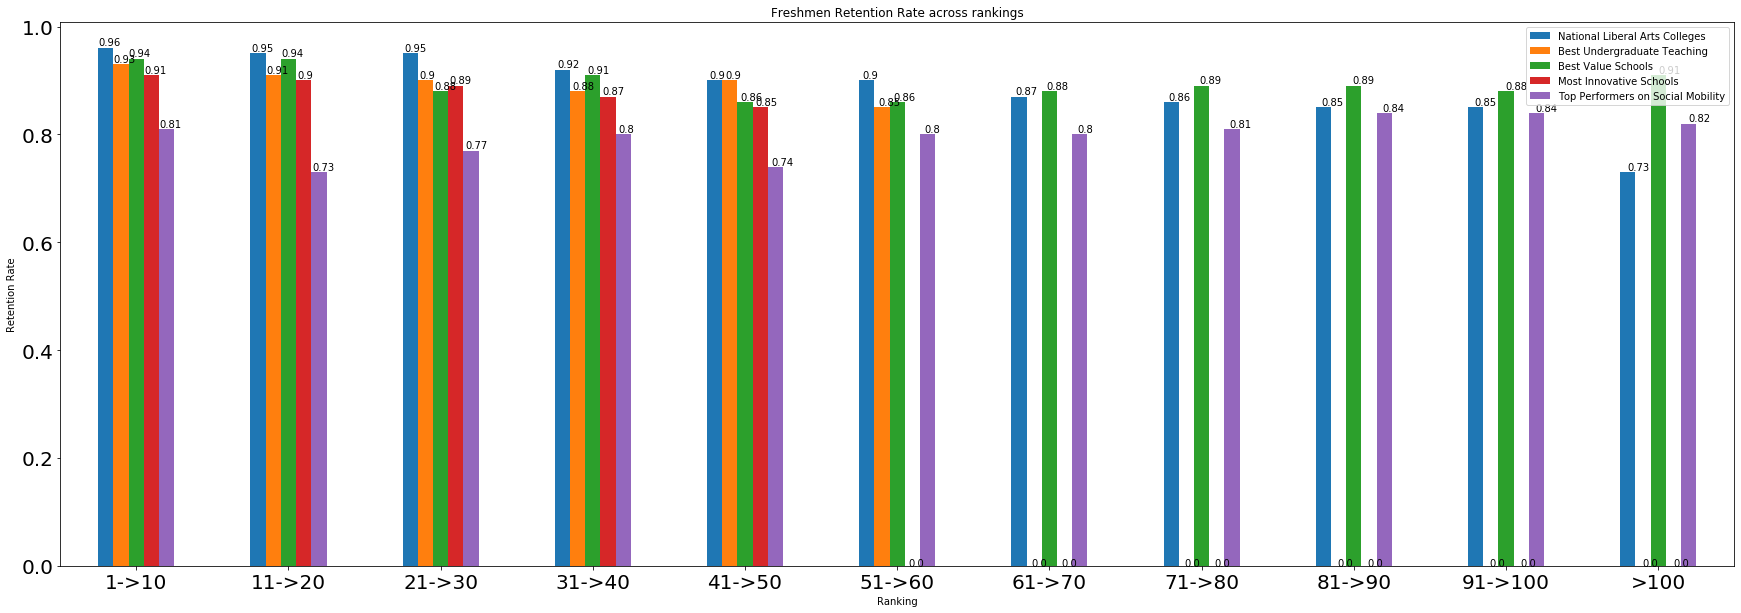

In [92]:
figure = plt.Figure(figsize = (30,200))
df = pd.DataFrame({ 'National Liberal Arts Colleges' : ranking,
                    'Best Undergraduate Teaching' : best_teaching, 
                    'Best Value Schools' : best_values,
                    'Most Innovative Schools' :  most_innovative,
                    'Top Performers on Social Mobility' : social_mobility}, 
                 index = labels)
ax = df.plot.bar(rot = 0, figsize = (30,10), fontsize =20, title = 'Freshmen Retention Rate across rankings')
ax.set_xlabel("Ranking")
ax.set_ylabel("Retention Rate")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

fig = ax.get_figure()
fig.savefig("retention_rate.png")

In [83]:
usnews[(usnews[category[5]] >= 11) & (usnews[category[5]] <= 11+9)]['Freshmen_retention'].mean()

0.7316666666666666